In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [163]:
from sklearn.datasets import load_digits

digits = load_digits()

In [164]:
X = digits.data
y = digits.target

In [165]:
print(X.shape,y.shape)

(1797, 64) (1797,)


In [166]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and temporary (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary data into training (80%) and validation (20%)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [167]:
print(X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_test.shape,y_test.shape)

(1077, 64) (1077,) (360, 64) (360,) (360, 64) (360,)


In [168]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=10,n_estimators=22,)

In [169]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=22)

In [170]:
from sklearn.metrics import accuracy_score

predictions = rfc.predict(X_train)
print("Accuracy Score =", format(accuracy_score(y_train,predictions)))

Accuracy Score = 1.0


In [171]:
from sklearn.metrics import accuracy_score

predictions = rfc.predict(X_valid)
print("Accuracy Score =", format(accuracy_score(y_valid,predictions)))

Accuracy Score = 0.9472222222222222


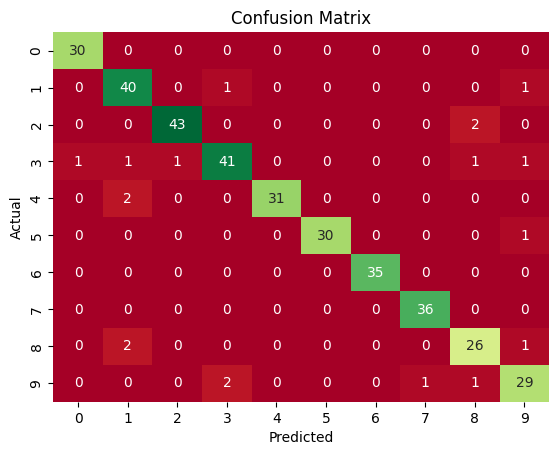

In [172]:
from sklearn.metrics import confusion_matrix

prediction = rfc.predict(X_valid)
cm = confusion_matrix(y_valid, prediction)

labels = np.unique(y_valid)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



from sklearn import tree
features = digits.data
target = digits.target


plt.figure(figsize=(5,10))
tree.plot_tree(rfc.estimators_[1])

plt.figure(figsize=(5,10))
tree.plot_tree(rfc.estimators_[1])
plt.savefig('fig'+str(i))
plt.show()

In [173]:
len(rfc.estimators_)

22

In [174]:
from sklearn.metrics import recall_score,precision_score,f1_score

prediction = rfc.predict(X_valid)
print("Precision = ",format(precision_score(y_valid,prediction,average=None)))
print("Recall = ",format(recall_score(y_valid,prediction,average=None)))
print("F-1 Score = ",format(f1_score(y_valid,prediction,average=None)))


Precision =  [0.96774194 0.88888889 0.97727273 0.93181818 1.         1.
 1.         0.97297297 0.86666667 0.87878788]
Recall =  [1.         0.95238095 0.95555556 0.89130435 0.93939394 0.96774194
 1.         1.         0.89655172 0.87878788]
F-1 Score =  [0.98360656 0.91954023 0.96629213 0.91111111 0.96875    0.98360656
 1.         0.98630137 0.88135593 0.87878788]


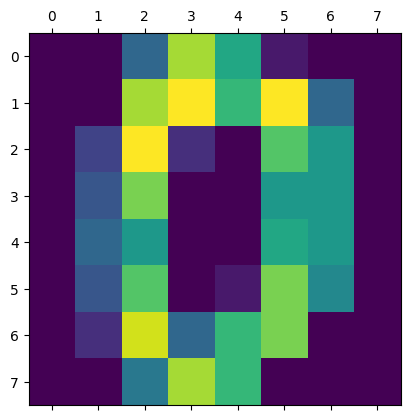

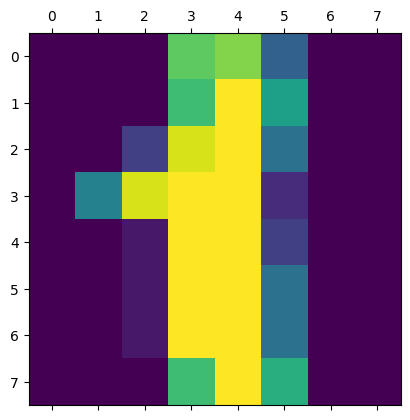

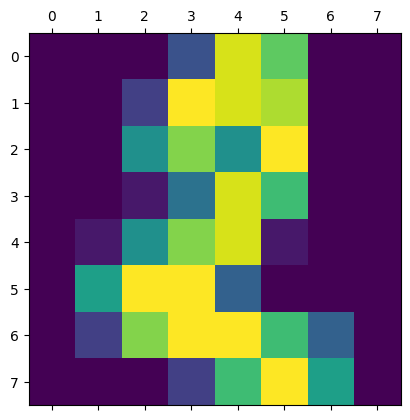

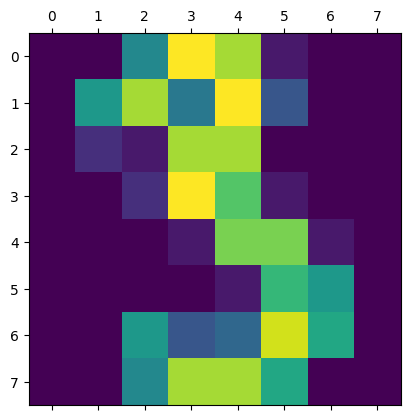

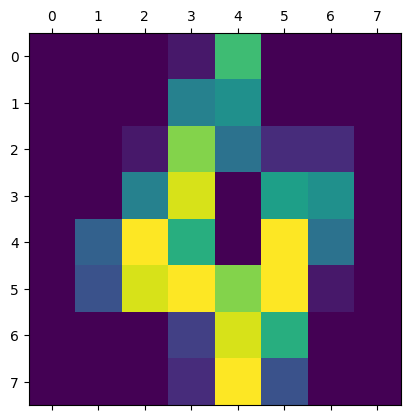

In [175]:
for i in range(5):
    plt.matshow(digits.images[i])

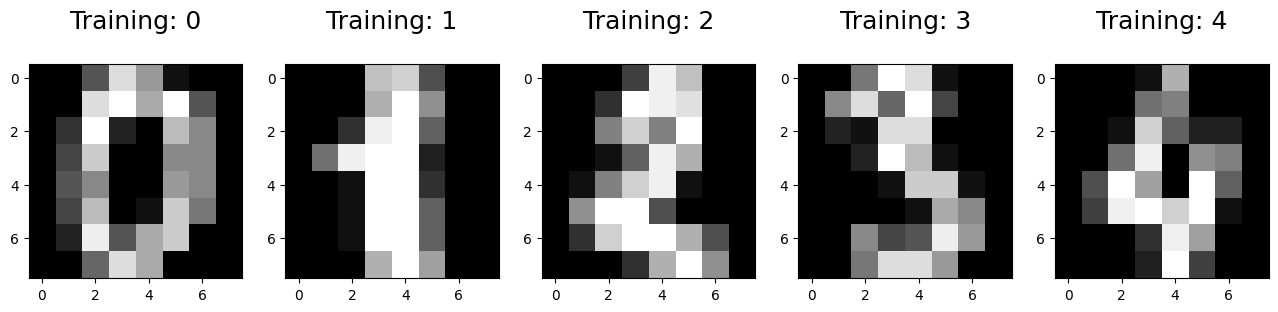

In [176]:
plt.figure(figsize=(16,9))
for index, (image, label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 18)